## Ref

- https://velog.io/@ie8907/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-Recommender-System

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /Users/macos/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2


In [2]:
import json

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies_df = pd.read_csv(f'{path}/tmdb_5000_movies.csv')

In [3]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies_df.shape

(4803, 20)

In [5]:
# 중요한 칼럼만 선택
selected_columns = ['id', 'title', 'genres', 'keywords']
movies_df = movies_df[selected_columns]

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   title     4803 non-null   object
 2   genres    4803 non-null   object
 3   keywords  4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
# TF-IDF 변환을 위한 벡터화 객체 생성
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [7]:
# 'genres'와 'keywords' 칼럼을 합친 새로운 칼럼 생성
movies_df['content'] = movies_df['genres'] + ' ' + movies_df['keywords']

movies_df.iloc[0]['content']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}] [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [18]:
def content_text(value):
    try:
        value = value.replace('[]','').strip() if '[]' in value else value
        value = json.loads(value.replace('] [', ', '))
        return ', '.join([text['name'] for text in value])
    except:
        print(value)
        return ''

In [19]:
content_text(movies_df.iloc[0]['content'])

'Action, Adventure, Fantasy, Science Fiction, culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d'

In [20]:
movies_df['content_text'] = movies_df['content'].apply(content_text)

In [21]:
movies_df = movies_df.dropna()

In [22]:
# TF-IDF 행렬 생성
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['content_text'])

In [23]:
tfidf_matrix

<4777x7069 sparse matrix of type '<class 'numpy.float64'>'
	with 60983 stored elements in Compressed Sparse Row format>

In [24]:
# 코사인 유사도 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
cosine_sim

array([[1.        , 0.03468798, 0.01771456, ..., 0.05675512, 0.02880383,
        0.        ],
       [0.03468798, 1.        , 0.02164808, ..., 0.        , 0.02358211,
        0.        ],
       [0.01771456, 0.02164808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05675512, 0.        , 0.        , ..., 1.        , 0.16750316,
        0.        ],
       [0.02880383, 0.02358211, 0.        , ..., 0.16750316, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
# 콘텐츠 기반 필터링
def content_based_filtering(title, cosine_sim=cosine_sim):
    # 제목에 해당하는 인덱스 찾기
    idx = movies_df[movies_df['title'] == title].index[0]

    # 해당 영화에 대한 유사도 측정
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 상위 10개 영화 선택
    sim_scores = sim_scores[1:11]

    # 선택된 영화의 인덱스
    movie_indices = [movies_df['title'].iloc[i[0]] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]
    
    rst_df = pd.DataFrame({'title':movie_indices,
                           'sim_score':movie_scores})
    
    # 선택된 영화의 제목으로 반환
    return rst_df

## 기존 결과
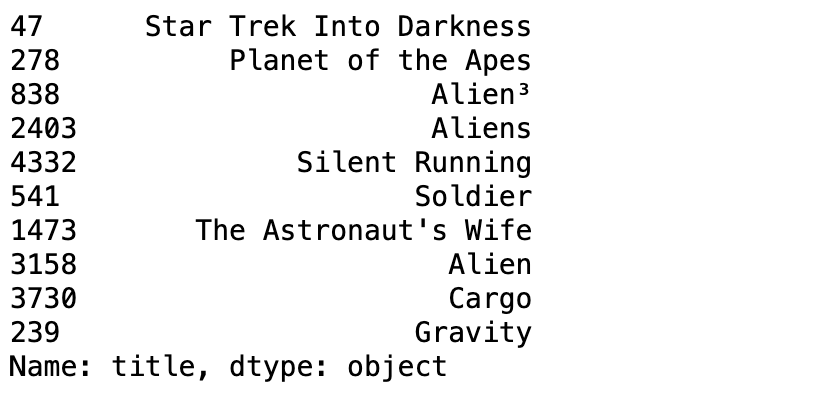

## 실제 텍스트만을 추출하여 추천을 돌려본 결과 기존과 결과가 미묘하게 달라짐

In [30]:
movies_df.iloc[1]['title']

"Pirates of the Caribbean: At World's End"

In [33]:
result = content_based_filtering("Avatar")
result

,title,sim_score
0,Planet of the Apes,0.441035
1,Gravity,0.430008
2,Aliens,0.429973
3,Alien³,0.428176
4,Soldier,0.425056
5,Star Trek Into Darkness,0.423100
6,Mission to Mars,0.414429
7,Silent Running,0.412605
8,Space Chimps,0.400098
9,Space Dogs,0.393604


In [31]:
# 예시
result = content_based_filtering("Pirates of the Caribbean: At World's End")
result

,title,sim_score
0,Pirates of the Caribbean: Dead Man's Chest,0.482914
1,Pirates of the Caribbean: The Curse of the Bla...,0.395735
2,Cutthroat Island,0.294540
3,Anna and the King,0.267440
4,Nim's Island,0.212445
5,Pirates of the Caribbean: On Stranger Tides,0.212437
6,Swept Away,0.208508
7,Shipwrecked,0.201579
8,Dead Like Me: Life After Death,0.186413
9,Half Baked,0.180381
